- 참고 

    - concat한 피클 -> jongstation.pickle
    - 최종 결과물 -> final_jongro.pickle 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime

In [2]:
gu = ['종로구', '노원구']
path = 'C:/Users/user/Finance/bigcon/데이터/환경기상데이터/' 
colnames = ['pm10', 'pm25']

In [3]:
#종로구
jongro_mno = []
#파일 이름을 불러온다
for root, dirs, files in os.walk(path+gu[0]):
    for file in files:
        jongro_mno.append(file)

print(jongro_mno)

['V01o1610468.csv', 'V10O1610252.csv', 'V10O1610540.csv', 'V10O1610542.csv', 'V10O1610543.csv', 'V10O1610544.csv', 'V10O1610545.csv', 'V10O1610546.csv', 'V10O1610567.csv', 'V10O1611145.csv', 'V10O1611151.csv', 'V10O1611170.csv', 'V10O1611172.csv', 'V10O1611173.csv', 'V10O1611220.csv', 'V10O1611251.csv', 'V10O1611255.csv', 'V10O1611258.csv', 'V10O1611289.csv', 'V10O1611623.csv', 'V10O1611634.csv', 'V10O1611639.csv', 'V10O1611645.csv', 'V10O1611658.csv', 'V10O1611684.csv', 'V10O1611698.csv', 'V10O1611722.csv', 'V10O1611750.csv', 'V10O1611887.csv', 'V10O1612106.csv', 'V10O1612113.csv']


In [4]:
# concat한 pickle 불러오기
jongstation = pd.read_pickle("./jongstation.pickle")
jongstation

serial                    V01o1610468  V10O1610252  V10O1610540  V10O1610542  \
tm                                                                             
2018-04-01 00:00:00 pm10          NaN         60.0         32.0         41.0   
                    pm25          NaN         30.0         16.0         20.0   
2018-04-01 00:01:00 pm10          NaN         54.0         34.0         37.0   
                    pm25          NaN         27.0         17.0         18.0   
2018-04-01 00:02:00 pm10          NaN         56.0         43.0         41.0   
...                               ...          ...          ...          ...   
2019-03-31 23:57:00 pm25          NaN         13.0         16.0         23.0   
2019-03-31 23:58:00 pm10          NaN         26.0         36.0         48.0   
                    pm25          NaN         17.0         23.0         31.0   
2019-03-31 23:59:00 pm10          NaN         16.0         36.0         48.0   
                    pm25          NaN         10.0         23.0         31.0   

serial                    V10O1610543  V10O1610544  V10O1610545  V10O1610546  \
tm                                                                             
2018-04-01 00:00:00 pm10         38.0         30.0         38.0         34.0   
                    pm25         20.0         15.0         19.0         18.0   
2018-04-01 00:01:00 pm10         38.0         35.0         37.0         37.0   
                    pm25         20.0         18.0         18.0         19.0   
2018-04-01 00:02:00 pm10         45.0         31.0         38.0         35.0   
...                               ...          ...          ...          ...   
2019-03-31 23:57:00 pm25         21.0         13.0         19.0         21.0   
2019-03-31 23:58:00 pm10         18.0         17.0         46.0         12.0   
                    pm25         11.0         11.0         30.0          7.0   
2019-03-31 23:59:00 pm10         20.0         44.0         25.0         13.0   
                    pm25         13.0         29.0         16.0          8.0   

serial                    V10O1610567  V10O1611145  ...  V10O1611639  \
tm                                                  ...                
2018-04-01 00:00:00 pm10         39.0         33.0  ...         45.0   
                    pm25         19.0         17.0  ...         24.0   
2018-04-01 00:01:00 pm10         42.0         34.0  ...         45.0   
                    pm25         21.0         18.0  ...         24.0   
2018-04-01 00:02:00 pm10         38.0         37.0  ...         51.0   
...                               ...          ...  ...          ...   
2019-03-31 23:57:00 pm25          8.0         14.0  ...         11.0   
2019-03-31 23:58:00 pm10         16.0         14.0  ...         24.0   
                    pm25         10.0          9.0  ...         15.0   
2019-03-31 23:59:00 pm10         27.0         24.0  ...         16.0   
                    pm25         17.0         15.0  ...         10.0   

serial                    V10O1611645  V10O1611658  V10O1611684  V10O1611698  \
tm                                                                             
2018-04-01 00:00:00 pm10         70.0         43.0         44.0         43.0   
                    pm25         38.0         23.0         24.0         23.0   
2018-04-01 00:01:00 pm10         59.0         23.0         46.0         21.0   
                    pm25         32.0         12.0         25.0         11.0   
2018-04-01 00:02:00 pm10         58.0         56.0         43.0         30.0   
...                               ...          ...          ...          ...   
2019-03-31 23:57:00 pm25         17.0          7.0         11.0          NaN   
2019-03-31 23:58:00 pm10         18.0         36.0          9.0          NaN   
                    pm25         11.0         23.0          5.0          NaN   
2019-03-31 23:59:00 pm10         21.0         15.0         14.0          NaN   
                    p

In [5]:
#tm --> date와 time으로 split 
jongstation = jongstation.reset_index()
jongstation['tm'] = pd.to_datetime(jongstation.tm, format="%Y%m%d%H%M")
jongstation = jongstation.rename(columns={'level_1':'pm'})

jongstation['date'] = pd.to_datetime(jongstation['tm']).dt.date
jongstation['time'] = pd.to_datetime(jongstation['tm']).dt.time
jongstation = jongstation.set_index(['date', 'time', 'pm'])
jongstation.drop(['V01o1610468'],axis='columns', inplace=True) #V01o1610468 제거
jongstation

serial                                    tm  V10O1610252  V10O1610540  \
date       time     pm                                                   
2018-04-01 00:00:00 pm10 2018-04-01 00:00:00         60.0         32.0   
                    pm25 2018-04-01 00:00:00         30.0         16.0   
           00:01:00 pm10 2018-04-01 00:01:00         54.0         34.0   
                    pm25 2018-04-01 00:01:00         27.0         17.0   
           00:02:00 pm10 2018-04-01 00:02:00         56.0         43.0   
...                                      ...          ...          ...   
2019-03-31 23:57:00 pm25 2019-03-31 23:57:00         13.0         16.0   
           23:58:00 pm10 2019-03-31 23:58:00         26.0         36.0   
                    pm25 2019-03-31 23:58:00         17.0         23.0   
           23:59:00 pm10 2019-03-31 23:59:00         16.0         36.0   
                    pm25 2019-03-31 23:59:00         10.0         23.0   

serial                    V10O1610542  V10O1610543  V10O1610544  V10O1610545  \
date       time     pm                                                         
2018-04-01 00:00:00 pm10         41.0         38.0         30.0         38.0   
                    pm25         20.0         20.0         15.0         19.0   
           00:01:00 pm10         37.0         38.0         35.0         37.0   
                    pm25         18.0         20.0         18.0         18.0   
           00:02:00 pm10         41.0         45.0         31.0         38.0   
...                               ...          ...          ...          ...   
2019-03-31 23:57:00 pm25         23.0         21.0         13.0         19.0   
           23:58:00 pm10         48.0         18.0         17.0         46.0   
                    pm25         31.0         11.0         11.0         30.0   
           23:59:00 pm10         48.0         20.0         44.0         25.0   
                    pm25         31.0         13.0         29.0         16.0   

serial                    V10O1610546  V10O1610567  V10O1611145  ...  \
date       time     pm                                           ...   
2018-04-01 00:00:00 pm10         34.0         39.0         33.0  ...   
                    pm25         18.0         19.0         17.0  ...   
           00:01:00 pm10         37.0         42.0         34.0  ...   
                    pm25         19.0         21.0         18.0  ...   
           00:02:00 pm10         35.0         38.0         37.0  ...   
...                               ...          ...          ...  ...   
2019-03-31 23:57:00 pm25         21.0          8.0         14.0  ...   
           23:58:00 pm10         12.0         16.0         14.0  ...   
                    pm25          7.0         10.0          9.0  ...   
           23:59:00 pm10         13.0         27.0         24.0  ...   
                    pm25          8.0         17.0         15.0  ...   

serial                    V10O1611639  V10O1611645  V10O1611658  V10O1611684  \
date       time     pm                                                         
2018-04-01 00:00:00 pm10         45.0         70.0         43.0         44.0   
                    pm25         24.0         38.0         23.0         24.0   
           00:01:00 pm10         45.0         59.0         23.0         46.0   
                    pm25         24.0         32.0         12.0         25.0   
           00:02:00 pm10         51.0         58.0         56.0         43.0   
...                               ...          ...          ...          ...   
2019-03-31 23:57:00 pm25         11.0         17.0          7.0         11.0   
           23:58:00 pm10         24.0         18.0         36.0          9.0   
                    pm25         15.0         11.0         23.0          5.0   
           23:59:00 pm10         16.0         21.0         15.0         14.0   
                    pm25         10.0         13.0          9.0          9.0   

serial            

1. 활동 시간(체감시간) 적용 -> 05:00~ 23:59 

In [6]:
jongstation = jongstation.reset_index()
jongstation = jongstation[jongstation.time > datetime.time(4, 59)]
jongstation = jongstation.set_index(['tm','date', 'time', 'pm'])
jongstation

serial                                        V10O1610252  V10O1610540  \
tm                  date       time     pm                               
2018-04-01 05:00:00 2018-04-01 05:00:00 pm10         63.0         40.0   
                                        pm25         28.0         19.0   
2018-04-01 05:01:00 2018-04-01 05:01:00 pm10         55.0         42.0   
                                        pm25         25.0         20.0   
2018-04-01 05:02:00 2018-04-01 05:02:00 pm10         68.0         45.0   
...                                                   ...          ...   
2019-03-31 23:57:00 2019-03-31 23:57:00 pm25         13.0         16.0   
2019-03-31 23:58:00 2019-03-31 23:58:00 pm10         26.0         36.0   
                                        pm25         17.0         23.0   
2019-03-31 23:59:00 2019-03-31 23:59:00 pm10         16.0         36.0   
                                        pm25         10.0         23.0   

serial                                        V10O1610542  V10O1610543  \
tm                  date       time     pm                               
2018-04-01 05:00:00 2018-04-01 05:00:00 pm10         44.0         46.0   
                                        pm25         21.0         23.0   
2018-04-01 05:01:00 2018-04-01 05:01:00 pm10         45.0         42.0   
                                        pm25         21.0         21.0   
2018-04-01 05:02:00 2018-04-01 05:02:00 pm10         41.0         38.0   
...                                                   ...          ...   
2019-03-31 23:57:00 2019-03-31 23:57:00 pm25         23.0         21.0   
2019-03-31 23:58:00 2019-03-31 23:58:00 pm10         48.0         18.0   
                                        pm25         31.0         11.0   
2019-03-31 23:59:00 2019-03-31 23:59:00 pm10         48.0         20.0   
                                        pm25         31.0         13.0   

serial                                        V10O1610544  V10O1610545  \
tm                  date       time     pm                               
2018-04-01 05:00:00 2018-04-01 05:00:00 pm10         36.0         36.0   
                                        pm25         18.0         17.0   
2018-04-01 05:01:00 2018-04-01 05:01:00 pm10         36.0         41.0   
                                        pm25         18.0         19.0   
2018-04-01 05:02:00 2018-04-01 05:02:00 pm10         36.0         39.0   
...                                                   ...          ...   
2019-03-31 23:57:00 2019-03-31 23:57:00 pm25         13.0         19.0   
2019-03-31 23:58:00 2019-03-31 23:58:00 pm10         17.0         46.0   
                                        pm25         11.0         30.0   
2019-03-31 23:59:00 2019-03-31 23:59:00 pm10         44.0         25.0   
                                        pm25         29.0         16.0   

serial                                        V10O1610546  V10O1610567  \
tm                  date       time     pm                               
2018-04-01 05:00:00 2018-04-01 05:00:00 pm10         39.0         37.0   
                                        pm25         20.0         17.0   
2018-04-01 05:01:00 2018-04-01 05:01:00 pm10         39.0         44.0   
                                        pm25         20.0         21.0   
2018-04-01 05:02:00 2018-04-01 05:02:00 pm10         36.0         42.0   
...                                                   ...          ...   
2019-03-31 23:57:00 2019-03-31 23:57:00 pm25         21.0          8.0   
2019-03-31 23:58:00 2019-03-31 23:58:00 pm10         12.0         16.0   
                                        pm25          7.0         10.0   
2019-03-31 23:59:00 2019-03-31 23:59:00 pm10         13.0         27.0   
                                        pm25          8.0         17.0   

serial                                        V10O1611145  V10O1611151  ...  \
tm                  date       time     pm                           

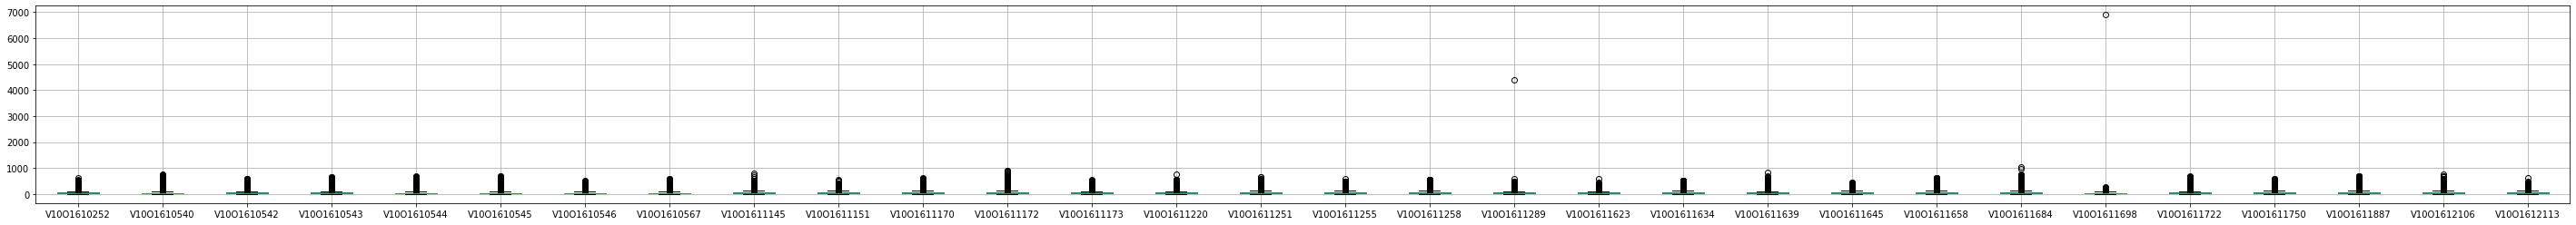

In [7]:
#이상치 확인
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (50,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
jongstation.boxplot()

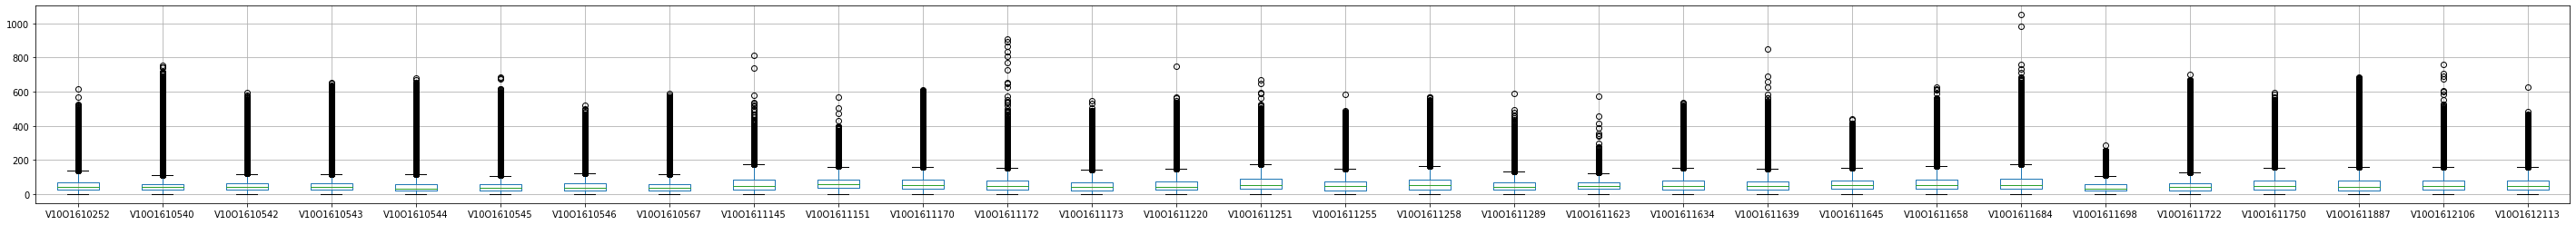

In [8]:
jongstation= jongstation.reset_index()
a = jongstation[jongstation['pm']=='pm10']

#이상치 확인
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (50,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
a.boxplot()

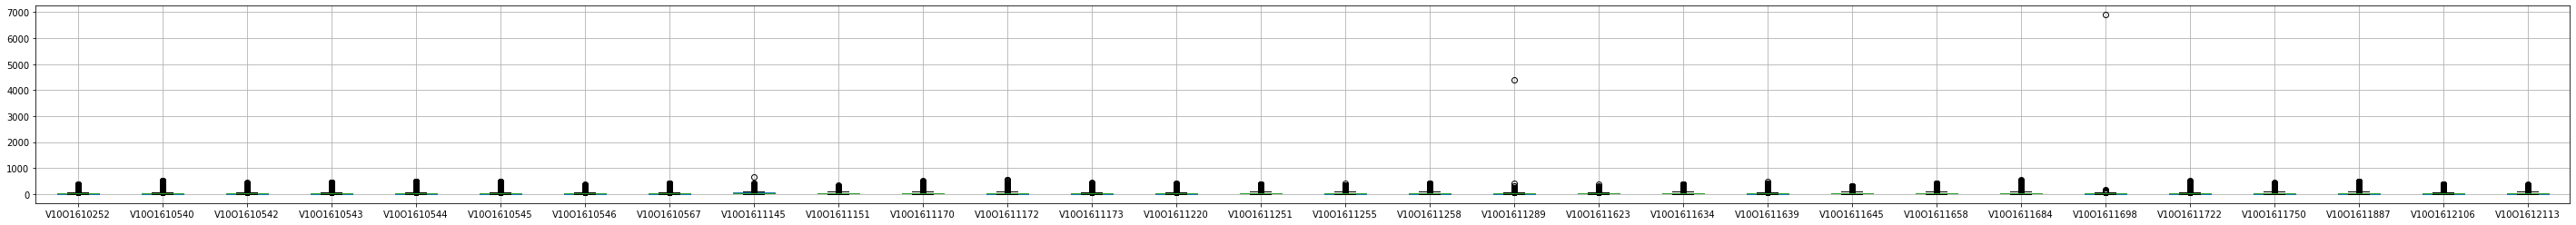

In [9]:
b = jongstation[jongstation['pm']=='pm25']
#이상치 확인
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (50,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
b.boxplot()

In [10]:
#이상치 처리 (1분전과 1분후의 중간값으로 바꿔줌)
jongstation= jongstation.reset_index()

print(jongstation['V10O1611289'].max(),'->', end="")
i = jongstation['V10O1611289'].idxmax()
jongstation['V10O1611289'][i] = round((jongstation['V10O1611289'][i-2]+
                                   jongstation['V10O1611289'][i+2])/2)
print(jongstation['V10O1611289'][i])

print(jongstation['V10O1611698'].max(),'->', end="")
i = jongstation['V10O1611698'].idxmax()
jongstation['V10O1611698'][i] = round((jongstation['V10O1611698'][i-2]+
                                   jongstation['V10O1611698'][i+2])/2)
print(jongstation['V10O1611698'][i])

4406.0 ->9.0
6900.0 ->13.0


C:\Users\user\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\user\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


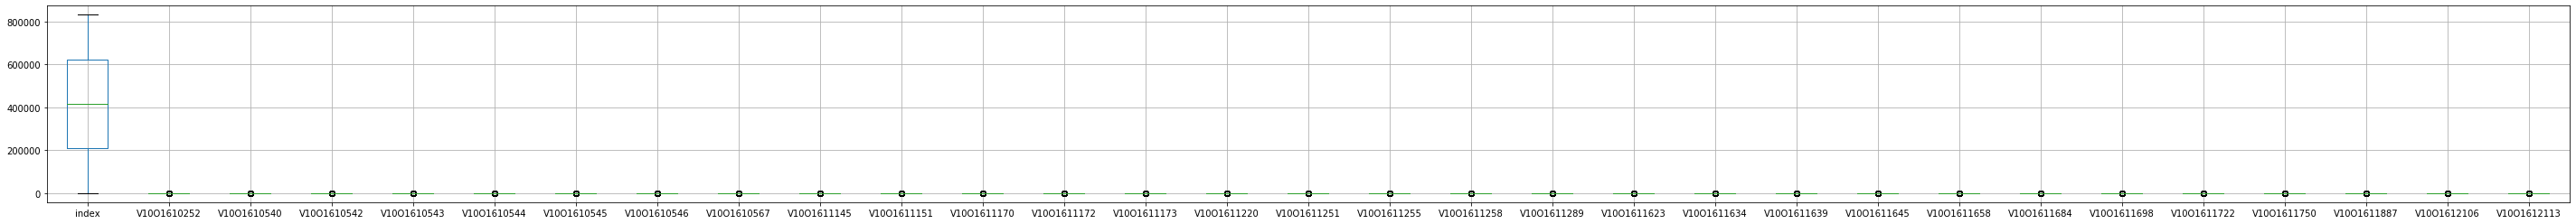

In [11]:
#이상치 처리 후 
plt.rcParams["figure.figsize"] = (50,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
jongstation.boxplot()

2. 시간 당 미세먼지 평균 농도 

In [12]:
# jongstation = jongstation.reset_index()
jongstation['hour'] = pd.to_datetime(jongstation['tm']).dt.hour 
jongstation

serial,index,tm,date,time,pm,V10O1610252,V10O1610540,V10O1610542,V10O1610543,V10O1610544,...,V10O1611645,V10O1611658,V10O1611684,V10O1611698,V10O1611722,V10O1611750,V10O1611887,V10O1612106,V10O1612113,hour
0,0,2018-04-01 05:00:00,2018-04-01,05:00:00,pm10,63.0,40.0,44.0,46.0,36.0,...,80.0,57.0,58.0,60.0,48.0,47.0,85.0,73.0,94.0,5
1,1,2018-04-01 05:00:00,2018-04-01,05:00:00,pm25,28.0,19.0,21.0,23.0,18.0,...,38.0,27.0,27.0,28.0,23.0,22.0,44.0,35.0,45.0,5
2,2,2018-04-01 05:01:00,2018-04-01,05:01:00,pm10,55.0,42.0,45.0,42.0,36.0,...,62.0,74.0,51.0,59.0,53.0,69.0,70.0,67.0,86.0,5
3,3,2018-04-01 05:01:00,2018-04-01,05:01:00,pm25,25.0,20.0,21.0,21.0,18.0,...,29.0,35.0,24.0,28.0,25.0,33.0,36.0,32.0,41.0,5
4,4,2018-04-01 05:02:00,2018-04-01,05:02:00,pm10,68.0,45.0,41.0,38.0,36.0,...,61.0,51.0,75.0,60.0,49.0,48.0,44.0,73.0,94.0,5
5,5,2018-04-01 05:02:00,2018-04-01,05:02:00,pm25,31.0,21.0,19.0,19.0,18.0,...,29.0,24.0,36.0,28.0,23.0,23.0,22.0,35.0,45.0,5
6,6,2018-04-01 05:03:00,2018-04-01,05:03:00,pm10,67.0,35.0,33.0,37.0,36.0,...,42.0,60.0,74.0,53.0,58.0,51.0,88.0,59.0,77.0,5
7,7,2018-04-01 05:03:00,2018-04-01,05:03:00,pm25,30.0,16.0,15.0,19.0,18.0,...,20.0,28.0,35.0,25.0,27.0,24.0,45.0,28.0,36.0,5
8,8,2018-04-01 05:04:00,2018-04-01,05:04:00,pm10,63.0,39.0,40.0,43.0,36.0,...,63.0,69.0,58.0,55.0,46.0,57.0,34.0,95.0,82.0,5
9,9,2018-04-01 05:04:00,2018-04-01,05:04:00,pm25,28.0,18.0,19.0,22.0,18.0,...,30.0,33.0,27.0,26.0,22.0,27.0,17.0,45.0,39.0,5


In [13]:
jongstation_hour = jongstation.groupby(['date','hour','pm']).mean().round(1)
jongstation_hour

serial                 index  V10O1610252  V10O1610540  V10O1610542  \
date       hour pm                                                    
2018-04-01 5    pm10      59         63.6         38.8         39.3   
                pm25      60         29.9         18.8         19.0   
           6    pm10     179         63.4         41.4         41.4   
                pm25     180         32.4         20.4         20.4   
           7    pm10     299         66.6         49.4         46.8   
...                      ...          ...          ...          ...   
2019-03-31 21   pm25  831900          9.5         14.4         13.4   
           22   pm10  832019         21.4         33.6         32.6   
                pm25  832020          9.4         15.1         14.6   
           23   pm10  832139         20.0         30.5         38.8   
                pm25  832140         11.6         17.9         23.2   

serial                V10O1610543  V10O1610544  V10O1610545  V10O1610546  \
date       hour pm                                                         
2018-04-01 5    pm10         45.2         41.2         39.3         43.1   
                pm25         24.0         21.9         18.9         23.0   
           6    pm10         57.6         57.2         42.7         56.9   
                pm25         31.9         31.8         21.2         31.5   
           7    pm10         59.3         57.6         49.5         60.8   
...                           ...          ...          ...          ...   
2019-03-31 21   pm25          9.5         10.5         19.9         12.2   
           22   pm10         22.0         24.9         43.6         27.2   
                pm25          9.8         11.0         19.5         12.2   
           23   pm10         22.1         24.8         40.8         26.2   
                pm25         12.9         14.8         24.1         15.4   

serial                V10O1610567  V10O1611145  ...  V10O1611639  V10O1611645  \
date       hour pm                              ...                             
2018-04-01 5    pm10         39.4         44.4  ...         51.6         60.6   
                pm25         19.0         23.5  ...         24.2         28.7   
           6    pm10         40.6         56.2  ...         57.7         57.6   
                pm25         20.0         31.0  ...         28.1         28.0   
           7    pm10         46.5         62.2  ...         65.9         73.4   
...                           ...          ...  ...          ...          ...   
2019-03-31 21   pm25         10.9         12.6  ...         10.4         16.6   
           22   pm10         24.6         28.0  ...         24.9         36.9   
                pm25         11.0         12.4  ...         11.0         16.4   
           23   pm10         22.8         24.4  ...         23.1         31.6   
                pm25         13.3         14.3  ...         13.5         18.7   

serial                V10O1611658  V10O1611684  V10O1611698  V10O1611722  \
date       hour pm                                                         
2018-04-01 5    pm10         55.3         58.4         57.3         52.1   
                pm25         26.1         27.5         27.0         24.6   
           6    pm10         62.2         70.6         52.2         63.8   
                pm25         30.3         34.5         25.1         31.3   
           7    pm10         73.8         70.1         49.8         74.5   
...                           ...          ...          ...          ...   
2019-03-31 21   pm25         10.9          8.5          NaN         10.9   
           22   pm10         25.9         22.2          NaN         23.2   
                pm25         11.6          9.9          NaN         10.2   
           23   pm10         24.2         19.8          NaN         23.3   
                pm25         14.0         11.5          NaN         13.6   

serial                V10O1611750  V10O16118

3. 미세먼지 클래스 분류 [0(좋음),1(보통),2(나쁨),3(매우나쁨)]

In [14]:
#pm 10 classification
jongstation_hour = jongstation_hour.reset_index(level = [0,1,2])
pm10 = jongstation_hour.loc[jongstation_hour['pm']=='pm10']
pm10.drop(['pm'], axis='columns', inplace=True)
pm10 = pm10.set_index(['date', 'hour'])

pm10_max = pd.DataFrame(pm10.T.stack(0).stack()).reset_index()
pm10_max = pm10_max[pm10_max['serial']!='index']
pm10_max.columns = ['serial','date','hour','pm10'] 
pm10_max_2= pm10_max  #뒤에서 쓰려고 저장
pm10_max = pm10_max.groupby(['serial','date']).max()

pm10_max['pm10_class'] = 1  #default 값 1(보통)
pm10_max 

a10 = pm10_max.reset_index(level=[0,1])
a10.loc[a10['pm10']< 31.0 , 'pm10_class'] = 0                           # 좋음(0): 0 < pm10 < 30
a10.loc[(a10['pm10']< 81.0) & (a10['pm10'] >= 31.0), 'pm10_class'] = 1    # 보통(1) :31 < pm10 < 80
a10.loc[(a10['pm10']< 151.0) & (a10['pm10']>= 81.0) , 'pm10_class'] = 2   # 나쁨(2): 81 < pm10 < 150
a10.loc[a10['pm10']>= 151.0 , 'pm10_class'] = 3                         # 매우나쁨(3): pm10 >= 151
a10

C:\Users\user\Anaconda3\envs\finance\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,serial,date,hour,pm10,pm10_class
0,V10O1610252,2018-04-01,23,76.9,1
1,V10O1610252,2018-04-02,23,79.3,1
2,V10O1610252,2018-04-03,23,89.6,2
3,V10O1610252,2018-04-04,23,19.2,0
4,V10O1610252,2018-04-05,23,15.0,0
5,V10O1610252,2018-04-06,23,205.0,3
6,V10O1610252,2018-04-07,23,61.4,1
7,V10O1610252,2018-04-08,23,27.0,0
8,V10O1610252,2018-04-09,23,59.9,1
9,V10O1610252,2018-04-10,23,69.3,1


In [15]:
jongstation_hour

serial,date,hour,pm,index,V10O1610252,V10O1610540,V10O1610542,V10O1610543,V10O1610544,V10O1610545,...,V10O1611639,V10O1611645,V10O1611658,V10O1611684,V10O1611698,V10O1611722,V10O1611750,V10O1611887,V10O1612106,V10O1612113
0,2018-04-01,5,pm10,59,63.6,38.8,39.3,45.2,41.2,39.3,...,51.6,60.6,55.3,58.4,57.3,52.1,48.1,72.2,68.6,88.5
1,2018-04-01,5,pm25,60,29.9,18.8,19.0,24.0,21.9,18.9,...,24.2,28.7,26.1,27.5,27.0,24.6,22.7,38.5,33.5,42.0
2,2018-04-01,6,pm10,179,63.4,41.4,41.4,57.6,57.2,42.7,...,57.7,57.6,62.2,70.6,52.2,63.8,54.4,90.0,78.6,81.2
3,2018-04-01,6,pm25,180,32.4,20.4,20.4,31.9,31.8,21.2,...,28.1,28.0,30.3,34.5,25.1,31.3,26.6,50.2,39.2,39.5
4,2018-04-01,7,pm10,299,66.6,49.4,46.8,59.3,57.6,49.5,...,65.9,73.4,73.8,70.1,49.8,74.5,68.1,78.7,81.8,78.7
5,2018-04-01,7,pm25,300,35.9,24.2,22.9,31.2,30.2,24.2,...,34.2,38.2,38.2,36.4,25.7,38.7,35.3,41.3,39.9,41.1
6,2018-04-01,8,pm10,419,67.3,64.5,59.3,64.6,61.8,65.6,...,61.2,61.9,65.0,63.0,60.1,59.7,59.5,94.1,90.8,91.5
7,2018-04-01,8,pm25,420,36.0,32.1,29.6,32.8,31.4,32.7,...,31.8,32.1,33.8,32.7,31.2,31.0,30.8,48.1,45.5,47.8
8,2018-04-01,9,pm10,539,64.7,61.7,56.6,62.9,60.8,61.1,...,59.4,61.6,60.7,61.2,60.3,57.7,54.0,92.0,90.9,88.8
9,2018-04-01,9,pm25,540,27.6,26.9,24.6,31.8,30.6,26.8,...,27.2,28.3,27.9,28.1,27.6,26.5,24.8,46.4,39.8,40.7


In [16]:
#pm25 classification

# jongstation_hour = jongstation_hour.reset_index()
pm25 = jongstation_hour.loc[jongstation_hour['pm']=='pm25']
pm25.drop(['pm'], axis='columns', inplace=True)
pm25 = pm25.set_index(['date', 'hour'])
pm25_max = pd.DataFrame(pm25.T.stack(0).stack()).reset_index()
pm25_max_2= pm25_max #뒤에서 쓰려고 저장
pm25_max = pm25_max.groupby(['serial','date']).max() # 일별 최대값을 그날의 대표값으로 지정
pm25_max.columns = ['hour','pm25']  

pm25_max['pm25_class'] = 1  # class =1(보통)
a25 = pm25_max.reset_index(level=[0,1])
a25 = a25[a25['serial']!='index']
a25.loc[a25['pm25']< 16.0 , 'pm25_class'] = 0
a25.loc[(a25['pm25']< 36.0) & (a25['pm25'] >= 16.0), 'pm25_class'] = 1
a25.loc[(a25['pm25']< 76.0) & (a25['pm25'] >= 36.0) , 'pm25_class'] = 2
a25.loc[a25['pm25']>= 76.0 , 'pm25_class'] = 3
a25 = a25.iloc[:,3:]
a25

,pm25,pm25_class
0,48.4,2
1,34.7,1
2,40.1,2
3,17.5,1
4,11.7,0
5,45.7,2
6,29.1,1
7,11.7,0
8,37.2,2
9,36.6,2


In [17]:
#pm25 classification

# jongstation_hour = jongstation_hour.reset_index()
pm25 = jongstation_hour.loc[jongstation_hour['pm']=='pm25']
pm25.drop(['pm'], axis='columns', inplace=True)
pm25 = pm25.set_index(['date', 'hour'])
pm25_max = pd.DataFrame(pm25.T.stack(0).stack()).reset_index()
pm25_max_2= pm25_max #뒤에서 쓰려고 저장
pm25_max = pm25_max.groupby(['serial','date']).max() # 일별 최대값을 그날의 대표값으로 지정
pm25_max.columns = ['hour','pm25']  

pm25_max['pm25_class'] = 1  # class =1(보통)
a25 = pm25_max.reset_index(level=[0,1])
a25.loc[a25['pm25']< 16.0 , 'pm25_class'] = 0
a25.loc[(a25['pm25']< 36.0) & (a25['pm25'] >= 16.0), 'pm25_class'] = 1
a25.loc[(a25['pm25']< 76.0) & (a25['pm25'] >= 36.0) , 'pm25_class'] = 2
a25.loc[a25['pm25']>= 76.0 , 'pm25_class'] = 3
a25 = a25.iloc[:,3:]
a25

,pm25,pm25_class
0,48.4,2
1,34.7,1
2,40.1,2
3,17.5,1
4,11.7,0
5,45.7,2
6,29.1,1
7,11.7,0
8,37.2,2
9,36.6,2


In [18]:
a1025 = [a10,a25]
pm_max = pd.concat(a1025, axis=1)
del pm_max['hour'] 
pm_max

,serial,date,pm10,pm10_class,pm25,pm25_class
0,V10O1610252,2018-04-01,76.9,1.0,48.4,2
1,V10O1610252,2018-04-02,79.3,1.0,34.7,1
2,V10O1610252,2018-04-03,89.6,2.0,40.1,2
3,V10O1610252,2018-04-04,19.2,0.0,17.5,1
4,V10O1610252,2018-04-05,15.0,0.0,11.7,0
5,V10O1610252,2018-04-06,205.0,3.0,45.7,2
6,V10O1610252,2018-04-07,61.4,1.0,29.1,1
7,V10O1610252,2018-04-08,27.0,0.0,11.7,0
8,V10O1610252,2018-04-09,59.9,1.0,37.2,2
9,V10O1610252,2018-04-10,69.3,1.0,36.6,2


In [19]:
# pm10과 pm25중 더 안좋은것을 기준으로 그날의 pm class 결정 
pm_max.loc[pm_max['pm10_class']< pm_max['pm25_class'] , 'pm_class'] = pm_max['pm25_class']
pm_max.loc[pm_max['pm10_class']< pm_max['pm25_class'] , 'pm_class_info'] ='pm25'

pm_max.loc[pm_max['pm10_class']>= pm_max['pm25_class'] , 'pm_class'] = pm_max['pm10_class']
pm_max.loc[pm_max['pm10_class']>= pm_max['pm25_class'] , 'pm_class_info'] ='pm10'

pm_max['pm10_class'] = pm_max['pm10_class'].fillna(0).astype('int').astype('category')
pm_max['pm25_class'] = pm_max['pm25_class'].astype('int').astype('category')
pm_max['pm_class'] = pm_max['pm_class'].fillna(0).astype('int')
pm_max['pm_class_info'] = pm_max['pm_class_info'].astype('category')
pm_max

,serial,date,pm10,pm10_class,pm25,pm25_class,pm_class,pm_class_info
0,V10O1610252,2018-04-01,76.9,1,48.4,2,2,pm25
1,V10O1610252,2018-04-02,79.3,1,34.7,1,1,pm10
2,V10O1610252,2018-04-03,89.6,2,40.1,2,2,pm10
3,V10O1610252,2018-04-04,19.2,0,17.5,1,1,pm25
4,V10O1610252,2018-04-05,15.0,0,11.7,0,0,pm10
5,V10O1610252,2018-04-06,205.0,3,45.7,2,3,pm10
6,V10O1610252,2018-04-07,61.4,1,29.1,1,1,pm10
7,V10O1610252,2018-04-08,27.0,0,11.7,0,0,pm10
8,V10O1610252,2018-04-09,59.9,1,37.2,2,2,pm25
9,V10O1610252,2018-04-10,69.3,1,36.6,2,2,pm25


In [20]:
pm_max.to_pickle("./jong_day_class.pickle")

In [21]:
#pm10시간당 평균농도
pm10_max_2 
pm10_max_2.columns =['serial', 'date', 'hour', 'pm10']
pm10_max_2 

,serial,date,hour,pm10
6935,V10O1610252,2018-04-01,5,63.6
6936,V10O1610252,2018-04-01,6,63.4
6937,V10O1610252,2018-04-01,7,66.6
6938,V10O1610252,2018-04-01,8,67.3
6939,V10O1610252,2018-04-01,9,64.7
6940,V10O1610252,2018-04-01,10,69.2
6941,V10O1610252,2018-04-01,11,67.9
6942,V10O1610252,2018-04-01,12,60.9
6943,V10O1610252,2018-04-01,13,55.6
6944,V10O1610252,2018-04-01,14,61.7


In [22]:
#pm10이 150이상인 날
pm150 = pm10_max_2[pm10_max_2['pm10']>150].reset_index(drop=True)
del pm150['pm10']
pm150

,serial,date,hour
0,V10O1610252,2018-04-06,13
1,V10O1610252,2018-04-06,14
2,V10O1610252,2018-04-06,15
3,V10O1610252,2018-04-06,16
4,V10O1610252,2018-04-06,17
5,V10O1610252,2018-05-24,11
6,V10O1610252,2018-05-24,12
7,V10O1610252,2018-05-24,13
8,V10O1610252,2018-05-24,14
9,V10O1610252,2018-05-24,15


In [23]:
# '두시간 지속' 조건 적용 1 (한시간만 기준치 넘은 날짜 제외)
hour_cnt = pd.DataFrame(pm150.groupby([pm150['serial'],pm150['date']], axis=0).count()['hour']) # 일별 기준치 넘은 hour의 횟수
hour_cnt = hour_cnt[hour_cnt>1] 
hour_cnt =hour_cnt.dropna()
hour_cnt= hour_cnt.reset_index()
hour_cnt.columns=['serial', 'date', 'hour_cnt']
hour_cnt

,serial,date,hour_cnt
0,V10O1610252,2018-04-06,5.0
1,V10O1610252,2018-05-24,11.0
2,V10O1610252,2018-10-15,2.0
3,V10O1610252,2018-11-10,2.0
4,V10O1610252,2018-11-27,7.0
5,V10O1610252,2018-11-29,2.0
6,V10O1610252,2019-01-13,5.0
7,V10O1610252,2019-01-14,19.0
8,V10O1610252,2019-01-15,9.0
9,V10O1610252,2019-02-20,10.0


In [24]:
over_pm10 = pd.merge(hour_cnt, pm150, how='left')
over_pm10 = over_pm10.set_index(['serial','date','hour_cnt','hour'])
over_pm10

Empty DataFrame
Columns: []
Index: [(V10O1610252, 2018-04-06 00:00:00, 5.0, 13), (V10O1610252, 2018-04-06 00:00:00, 5.0, 14), (V10O1610252, 2018-04-06 00:00:00, 5.0, 15), (V10O1610252, 2018-04-06 00:00:00, 5.0, 16), (V10O1610252, 2018-04-06 00:00:00, 5.0, 17), (V10O1610252, 2018-05-24 00:00:00, 11.0, 11), (V10O1610252, 2018-05-24 00:00:00, 11.0, 12), (V10O1610252, 2018-05-24 00:00:00, 11.0, 13), (V10O1610252, 2018-05-24 00:00:00, 11.0, 14), (V10O1610252, 2018-05-24 00:00:00, 11.0, 15), (V10O1610252, 2018-05-24 00:00:00, 11.0, 16), (V10O1610252, 2018-05-24 00:00:00, 11.0, 17), (V10O1610252, 2018-05-24 00:00:00, 11.0, 18), (V10O1610252, 2018-05-24 00:00:00, 11.0, 19), (V10O1610252, 2018-05-24 00:00:00, 11.0, 20), (V10O1610252, 2018-05-24 00:00:00, 11.0, 21), (V10O1610252, 2018-10-15 00:00:00, 2.0, 20), (V10O1610252, 2018-10-15 00:00:00, 2.0, 21), (V10O1610252, 2018-11-10 00:00:00, 2.0, 22), (V10O1610252, 2018-11-10 00:00:00, 2.0, 23), (V10O1610252, 2018-11-27 00:00:00, 7.0, 17), (V10O1610252, 2018-11-27 00:00:00, 7.0, 18), (V10O1610252, 2018-11-27 00:00:00, 7.0, 19), (V10O1610252, 2018-11-27 00:00:00, 7.0, 20), (V10O1610252, 2018-11-27 00:00:00, 7.0, 21), (V10O1610252, 2018-11-27 00:00:00, 7.0, 22), (V10O1610252, 2018-11-27 00:00:00, 7.0, 23), (V10O1610252, 2018-11-29 00:00:00, 2.0, 16), (V10O1610252, 2018-11-29 00:00:00, 2.0, 17), (V10O1610252, 2019-01-13 00:00:00, 5.0, 19), (V10O1610252, 2019-01-13 00:00:00, 5.0, 20), (V10O1610252, 2019-01-13 00:00:00, 5.0, 21), (V10O1610252, 2019-01-13 00:00:00, 5.0, 22), (V10O1610252, 2019-01-13 00:00:00, 5.0, 23), (V10O1610252, 2019-01-14 00:00:00, 19.0, 5), (V10O1610252, 2019-01-14 00:00:00, 19.0, 6), (V10O1610252, 2019-01-14 00:00:00, 19.0, 7), (V10O1610252, 2019-01-14 00:00:00, 19.0, 8), (V10O1610252, 2019-01-14 00:00:00, 19.0, 9), (V10O1610252, 2019-01-14 00:00:00, 19.0, 10), (V10O1610252, 2019-01-14 00:00:00, 19.0, 11), (V10O1610252, 2019-01-14 00:00:00, 19.0, 12), (V10O1610252, 2019-01-14 00:00:00, 19.0, 13), (V10O1610252, 2019-01-14 00:00:00, 19.0, 14), (V10O1610252, 2019-01-14 00:00:00, 19.0, 15), (V10O1610252, 2019-01-14 00:00:00, 19.0, 16), (V10O1610252, 2019-01-14 00:00:00, 19.0, 17), (V10O1610252, 2019-01-14 00:00:00, 19.0, 18), (V10O1610252, 2019-01-14 00:00:00, 19.0, 19), (V10O1610252, 2019-01-14 00:00:00, 19.0, 20), (V10O1610252, 2019-01-14 00:00:00, 19.0, 21), (V10O1610252, 2019-01-14 00:00:00, 19.0, 22), (V10O1610252, 2019-01-14 00:00:00, 19.0, 23), (V10O1610252, 2019-01-15 00:00:00, 9.0, 5), (V10O1610252, 2019-01-15 00:00:00, 9.0, 6), (V10O1610252, 2019-01-15 00:00:00, 9.0, 7), (V10O1610252, 2019-01-15 00:00:00, 9.0, 8), (V10O1610252, 2019-01-15 00:00:00, 9.0, 9), (V10O1610252, 2019-01-15 00:00:00, 9.0, 10), (V10O1610252, 2019-01-15 00:00:00, 9.0, 11), (V10O1610252, 2019-01-15 00:00:00, 9.0, 12), (V10O1610252, 2019-01-15 00:00:00, 9.0, 13), (V10O1610252, 2019-02-20 00:00:00, 10.0, 13), (V10O1610252, 2019-02-20 00:00:00, 10.0, 15), (V10O1610252, 2019-02-20 00:00:00, 10.0, 16), (V10O1610252, 2019-02-20 00:00:00, 10.0, 17), (V10O1610252, 2019-02-20 00:00:00, 10.0, 18), (V10O1610252, 2019-02-20 00:00:00, 10.0, 19), (V10O1610252, 2019-02-20 00:00:00, 10.0, 20), (V10O1610252, 2019-02-20 00:00:00, 10.0, 21), (V10O1610252, 2019-02-20 00:00:00, 10.0, 22), (V10O1610252, 2019-02-20 00:00:00, 10.0, 23), (V10O1610252, 2019-02-21 00:00:00, 6.0, 8), (V10O1610252, 2019-02-21 00:00:00, 6.0, 9), (V10O1610252, 2019-02-21 00:00:00, 6.0, 10), (V10O1610252, 2019-02-21 00:00:00, 6.0, 11), (V10O1610252, 2019-02-21 00:00:00, 6.0, 12), (V10O1610252, 2019-02-21 00:00:00, 6.0, 14), (V10O1610252, 2019-02-22 00:00:00, 3.0, 10), (V10O1610252, 2019-02-22 00:00:00, 3.0, 11), (V10O1610252, 2019-02-22 00:00:00, 3.0, 12), (V10O1610252, 2019-02-24 00:00:00, 3.0, 18), (V10O1610252, 2019-02-24 00:00:00, 3.0, 19), (V10O1610252, 2019-02-24 00:00:00, 3.0, 20), (V10O1610252, 2019-02-25 00:00:00, 7.0, 5), (V10O1610252, 2019-02-25 00:00:00, 7.0, 6), (V10O1610252, 2019-02-25 00:00:00, 7.0, 7), (V10O1610252, 2019-02-25

In [25]:
# '두시간 지속' 조건 적용 2 (연속된 시간)
over_pm10 = over_pm10.reset_index()
over_pm10['hour_sub'] = over_pm10['hour'] - over_pm10['hour'].shift(1) #시간차
over_pm10 = over_pm10[over_pm10['hour_sub']==1] #연속 
over_pm10 =over_pm10.set_index(['serial','date','hour_cnt','hour'])
over_pm10

hour_sub
serial      date       hour_cnt hour          
V10O1610252 2018-04-06 5.0      14         1.0
                                15         1.0
                                16         1.0
                                17         1.0
            2018-05-24 11.0     12         1.0
...                                        ...
V10O1612113 2019-03-27 7.0      13         1.0
                                20         1.0
                                21         1.0
                                22         1.0
                                23         1.0

[4465 rows x 1 columns]

In [26]:
# pm10 기준치 초과로 재난문자 울린 day
over_pm10 = over_pm10.reset_index()
pm10_msg_day= list(set(over_pm10['date'].dt.date)) # 재난문자 울린 day 목록
pm10_msg_day = pd.DataFrame(sorted(pm10_msg_day))
pm10_msg_day.columns=['date']
pm10_msg_day['msg_10']= 1
pm10_msg_day

,date,msg_10
0,2018-04-06,1
1,2018-04-07,1
2,2018-04-11,1
3,2018-04-15,1
4,2018-04-17,1
5,2018-04-18,1
6,2018-04-19,1
7,2018-04-20,1
8,2018-04-21,1
9,2018-04-30,1


In [27]:
# pm25시간당 평균농도
pm25_max_2 = pm25_max_2.reset_index(drop =True)
pm25_max_2 = pm25_max_2.rename(columns={0:'pm25'})
pm25_max_2 = pm25_max_2[pm25_max_2['serial']!='index']
pm25_max_2

,serial,date,hour,pm25
6935,V10O1610252,2018-04-01,5,29.9
6936,V10O1610252,2018-04-01,6,32.4
6937,V10O1610252,2018-04-01,7,35.9
6938,V10O1610252,2018-04-01,8,36.0
6939,V10O1610252,2018-04-01,9,27.6
6940,V10O1610252,2018-04-01,10,24.7
6941,V10O1610252,2018-04-01,11,24.6
6942,V10O1610252,2018-04-01,12,25.5
6943,V10O1610252,2018-04-01,13,25.2
6944,V10O1610252,2018-04-01,14,28.6


In [28]:
#pm25 75이상인 날
pm75 = pm25_max_2[pm25_max_2['pm25']>75].reset_index(drop=True)
pm75

,serial,date,hour,pm25
0,V10O1610252,2018-04-20,15,76.5
1,V10O1610252,2018-04-20,16,75.2
2,V10O1610252,2018-04-20,18,75.8
3,V10O1610252,2018-04-21,8,85.0
4,V10O1610252,2018-04-30,15,78.0
5,V10O1610252,2018-04-30,16,76.8
6,V10O1610252,2018-05-01,6,79.2
7,V10O1610252,2018-05-01,7,81.1
8,V10O1610252,2018-05-02,5,77.1
9,V10O1610252,2018-05-11,8,80.8


In [29]:
# '두시간 지속' 조건 적용 1(한시간만 기준치 넘은 날짜 제외)
hour_cnt = pd.DataFrame(pm75.groupby([pm75['serial'],pm75['date']], axis=0).count()['hour']) # 일별 기준치 넘은 hour의 횟수
hour_cnt = hour_cnt[hour_cnt>1] # 한시간 제외
hour_cnt =hour_cnt.dropna()
hour_cnt= hour_cnt.reset_index()
hour_cnt.columns=['serial', 'date', 'hour_cnt']
hour_cnt

,serial,date,hour_cnt
0,V10O1610252,2018-04-20,3.0
1,V10O1610252,2018-04-30,2.0
2,V10O1610252,2018-05-01,2.0
3,V10O1610252,2018-05-11,5.0
4,V10O1610252,2018-05-14,18.0
5,V10O1610252,2018-05-15,4.0
6,V10O1610252,2018-05-30,5.0
7,V10O1610252,2018-06-07,4.0
8,V10O1610252,2018-06-30,7.0
9,V10O1610252,2018-10-15,7.0


In [30]:
over_pm25 = pd.merge(hour_cnt, pm75, how='left')
del over_pm25['pm25']
# over_pm25 = over_pm10.set_index(['serial','date','hour_cnt','hour'])
over_pm25

,serial,date,hour_cnt,hour
0,V10O1610252,2018-04-20,3.0,15
1,V10O1610252,2018-04-20,3.0,16
2,V10O1610252,2018-04-20,3.0,18
3,V10O1610252,2018-04-30,2.0,15
4,V10O1610252,2018-04-30,2.0,16
5,V10O1610252,2018-05-01,2.0,6
6,V10O1610252,2018-05-01,2.0,7
7,V10O1610252,2018-05-11,5.0,8
8,V10O1610252,2018-05-11,5.0,9
9,V10O1610252,2018-05-11,5.0,10


In [31]:
# '두시간 지속' 조건 적용 2 (연속된 두시간)
over_pm25 = over_pm25.reset_index()
over_pm25['hour_sub'] = over_pm25['hour'] - over_pm25['hour'].shift(1) 
over_pm25 = over_pm25[over_pm25['hour_sub']==1] #연속 
over_pm25 =over_pm25.set_index(['serial','date','hour_cnt','hour'])
over_pm25

index  hour_sub
serial      date       hour_cnt hour                 
V10O1610252 2018-04-20 3.0      16        1       1.0
            2018-04-30 2.0      16        4       1.0
            2018-05-01 2.0      7         6       1.0
            2018-05-11 5.0      8         7       1.0
                                9         8       1.0
...                                     ...       ...
V10O1612113 2019-03-28 6.0      8     10109       1.0
                                9     10110       1.0
                                10    10111       1.0
                                11    10112       1.0
                                12    10113       1.0

[8168 rows x 2 columns]

In [32]:
# pm25 기준치 초과로 재난문자 울린 day
over_pm25 = over_pm25.reset_index()
pm25_msg_day= list(set(over_pm25['date'].dt.date)) # 재난문자 울린 day 목록
pm25_msg_day = pd.DataFrame(sorted(pm25_msg_day))
pm25_msg_day.columns=['date']
pm25_msg_day['msg_25'] =1
pm25_msg_day

,date,msg_25
0,2018-04-08,1
1,2018-04-09,1
2,2018-04-17,1
3,2018-04-18,1
4,2018-04-19,1
5,2018-04-20,1
6,2018-04-21,1
7,2018-04-28,1
8,2018-04-30,1
9,2018-05-01,1


In [33]:
#pm10, pm25 경보 문자 온 날 
msg_day = pd.merge(pm10_msg_day, pm25_msg_day, on= 'date', how='outer')
msg_day['date'] = pd.to_datetime(msg_day['date'])
msg_day

,date,msg_10,msg_25
0,2018-04-06,1.0,NaN
1,2018-04-07,1.0,NaN
2,2018-04-11,1.0,NaN
3,2018-04-15,1.0,NaN
4,2018-04-17,1.0,1.0
5,2018-04-18,1.0,1.0
6,2018-04-19,1.0,1.0
7,2018-04-20,1.0,1.0
8,2018-04-21,1.0,1.0
9,2018-04-30,1.0,1.0


In [34]:
# pm 총 월별 재난문자 횟수 뽑기(한시간평균, 경보문자 발령 day 수 count, 한달치 합계)
pm_msg_day = pd.DataFrame()
pm_msg_day['month'] = pd.to_datetime(msg_day['date']).dt.month
pm_msg_day['year'] = pd.to_datetime(msg_day['date']).dt.year
pm_msg_day['cnt']=1
msg_cnt = pm_msg_day.groupby(['year','month']).sum()
msg_cnt

cnt
year month     
2018 4       13
     5        7
     6        5
     7        3
     8        3
     10       8
     11      15
     12      20
2019 1       29
     2       27
     3       20

In [35]:
final_jongro = pd.merge(pm_max, msg_day, how='left', on='date')
final_jongro['msg_10'] = final_jongro['msg_10'].fillna(0)
final_jongro['msg_25'] = final_jongro['msg_25'].fillna(0)
cols =['serial', 'date', 'pm10', 'pm10_class', 'msg_10', 'pm25', 'pm25_class','msg_25', 'pm_class', 'pm_class_info']
final_jongro= final_jongro[cols]

final_jongro['msg_10'] = final_jongro['msg_10'].astype(int).astype('category')
final_jongro['msg_25'] = final_jongro['msg_25'].astype(int).astype('category')
final_jongro['pm_class'] = final_jongro['pm_class'].astype(int).astype('category') 
final_jongro['pm_class_info'] = final_jongro['pm_class_info'].astype('category')  
final_jongro

,serial,date,pm10,pm10_class,msg_10,pm25,pm25_class,msg_25,pm_class,pm_class_info
0,V10O1610252,2018-04-01,76.9,1,0,48.4,2,0,2,pm25
1,V10O1610252,2018-04-02,79.3,1,0,34.7,1,0,1,pm10
2,V10O1610252,2018-04-03,89.6,2,0,40.1,2,0,2,pm10
3,V10O1610252,2018-04-04,19.2,0,0,17.5,1,0,1,pm25
4,V10O1610252,2018-04-05,15.0,0,0,11.7,0,0,0,pm10
5,V10O1610252,2018-04-06,205.0,3,1,45.7,2,0,3,pm10
6,V10O1610252,2018-04-07,61.4,1,1,29.1,1,0,1,pm10
7,V10O1610252,2018-04-08,27.0,0,0,11.7,0,1,0,pm10
8,V10O1610252,2018-04-09,59.9,1,0,37.2,2,1,2,pm25
9,V10O1610252,2018-04-10,69.3,1,0,36.6,2,0,2,pm25


# 최종본
final_jongro.to_pickle("./final_jongro.pickle")

In [36]:
############### 추가코드 1. 스테이션 별 365 맞추기 
jongro = pd.read_pickle("./final_jongro.pickle") 
jongro = jongro[['serial', 'date','pm10','pm25']]

# serial별로 모든 날짜 다 있는 컬럼 만들기 
date = pd.date_range(start='20180401', end='20190331')
date = pd.DataFrame(date)
date = date.rename(columns={0:'date'})
print(len(date))
date

365


,date
0,2018-04-01
1,2018-04-02
2,2018-04-03
3,2018-04-04
4,2018-04-05
5,2018-04-06
6,2018-04-07
7,2018-04-08
8,2018-04-09
9,2018-04-10


In [37]:
station= list(set(jongro['serial']))
print(station)

df1 = pd.DataFrame(columns=['serial', 'date'])
for i in station:
    date['serial'] = i 
    df2 = date
    df1= pd.concat((df1, df2), axis=0)
date = df1

###확인 
date.groupby('serial').count()
date

['V10O1611173', 'V10O1611172', 'V10O1611887', 'V10O1611220', 'V10O1610567', 'V10O1612106', 'V10O1611645', 'V10O1610543', 'V10O1611750', 'V10O1612113', 'V10O1610542', 'V10O1611634', 'V10O1611658', 'V10O1611289', 'V10O1610544', 'V10O1611251', 'V10O1610540', 'V10O1610252', 'V10O1611255', 'V10O1611722', 'V10O1611151', 'V10O1611698', 'V10O1611145', 'V10O1610545', 'V10O1611639', 'V10O1611684', 'V10O1611170', 'V10O1611623', 'V10O1610546', 'V10O1611258']


C:\Users\user\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,date,serial
0,2018-04-01,V10O1611173
1,2018-04-02,V10O1611173
2,2018-04-03,V10O1611173
3,2018-04-04,V10O1611173
4,2018-04-05,V10O1611173
5,2018-04-06,V10O1611173
6,2018-04-07,V10O1611173
7,2018-04-08,V10O1611173
8,2018-04-09,V10O1611173
9,2018-04-10,V10O1611173


In [38]:
# outer 조인으로 스테이션별 365 맞추기(Nan값 맨 밑으로 가기에 sort해줌->날짜 순서대로)
jongro = pd.merge(jongro, date, how='outer').sort_values('date')
jongro

jongro.groupby('serial').count() # date 숫자 365 확인

,date,pm10,pm25
serial,,,
V10O1610252,365,348,348
V10O1610540,365,266,266
V10O1610542,365,265,265
V10O1610543,365,280,280
V10O1610544,365,341,341
V10O1610545,365,354,354
V10O1610546,365,295,295
V10O1610567,365,320,320
V10O1611145,365,364,364


In [39]:
# 날짜별 미세먼지 구평균
jongro_mean = jongro.groupby(['date']).mean().round(1)
jongro_mean

,pm10,pm25
date,,
2018-04-01,86.4,48.7
2018-04-02,82.6,34.1
2018-04-03,86.4,37.2
2018-04-04,25.5,14.2
2018-04-05,19.0,13.4
2018-04-06,209.1,50.0
2018-04-07,69.7,34.4
2018-04-08,47.8,24.5
2018-04-09,72.4,47.0


In [40]:
#### 날짜별 미세먼지 구평균 피클파일 저장 ★
jongro_mean.to_pickle("./jongro_mean.pickle")

In [41]:
# pm10_class
jongro_mean.loc[jongro_mean['pm10']< 31.0 , 'pm10_class'] = 0                           # 좋음(0): 0 < pm10 < 30
jongro_mean.loc[(jongro_mean['pm10']< 81.0) & (jongro_mean['pm10'] >= 31.0), 'pm10_class'] = 1    # 보통(1) :31 < pm10 < 80
jongro_mean.loc[(jongro_mean['pm10']< 151.0) & (jongro_mean['pm10']>= 81.0) , 'pm10_class'] = 2   # 나쁨(2): 81 < pm10 < 150
jongro_mean.loc[jongro_mean['pm10']>= 151.0 , 'pm10_class'] = 3                         # 매우나쁨(3): pm10 >= 151

# pm25_class
jongro_mean.loc[jongro_mean['pm25']< 16.0 , 'pm25_class'] = 0
jongro_mean.loc[(jongro_mean['pm25']< 36.0) & (jongro_mean['pm25'] >= 16.0), 'pm25_class'] = 1
jongro_mean.loc[(jongro_mean['pm25']< 76.0) & (jongro_mean['pm25'] >= 36.0) , 'pm25_class'] = 2
jongro_mean.loc[jongro_mean['pm25']>= 76.0 , 'pm25_class'] = 3

# pm_class(pm10과 pm25중 더 안좋은 것)
jongro_mean.loc[jongro_mean['pm10_class']< jongro_mean['pm25_class'] , 'pm_class'] = jongro_mean['pm25_class']
jongro_mean.loc[jongro_mean['pm10_class']>= jongro_mean['pm25_class'] , 'pm_class'] = jongro_mean['pm10_class']

# pm_class_info
jongro_mean.loc[jongro_mean['pm10_class']< jongro_mean['pm25_class'] , 'pm_class_info'] ='pm25'
jongro_mean.loc[jongro_mean['pm10_class']>= jongro_mean['pm25_class'] , 'pm_class_info'] ='pm10'

#
jongro_mean['pm10_class'] = jongro_mean['pm10_class'].astype('int')
jongro_mean['pm25_class'] = jongro_mean['pm25_class'].astype('int')
jongro_mean['pm_class'] = jongro_mean['pm_class'].astype('int')
# jongro_mean['pm_class_info'] = jongro_mean['pm_class_info'].astype('category')

jongro_mean

,pm10,pm25,pm10_class,pm25_class,pm_class,pm_class_info
date,,,,,,
2018-04-01,86.4,48.7,2,2,2,pm10
2018-04-02,82.6,34.1,2,1,2,pm10
2018-04-03,86.4,37.2,2,2,2,pm10
2018-04-04,25.5,14.2,0,0,0,pm10
2018-04-05,19.0,13.4,0,0,0,pm10
2018-04-06,209.1,50.0,3,2,3,pm10
2018-04-07,69.7,34.4,1,1,1,pm10
2018-04-08,47.8,24.5,1,1,1,pm10
2018-04-09,72.4,47.0,1,2,2,pm25


In [42]:
# pm10, pm25 NaN값을 해당날짜의 구 평균으로 채우기 
df1 = jongro[jongro["pm10"].isnull()==True]
df2 = jongro_mean

print(len(df1), len(df2))
df = pd.merge(df1, df2, on='date' , how='left')

df = df.drop(df.columns[[2,3,6,7,8,9]], axis='columns')
df = df.rename(columns={'pm10_y':'pm10', 'pm25_y':'pm25'})
df

1114 365


,serial,date,pm10,pm25
0,V10O1611634,2018-04-19,107.5,52.1
1,V10O1611634,2018-04-20,163.6,86.6
2,V10O1611634,2018-04-21,148.3,91.5
3,V10O1611634,2018-04-22,54.3,32.1
4,V10O1611634,2018-04-23,20.7,15.3
5,V10O1611634,2018-04-24,24.4,16.4
6,V10O1611684,2018-04-24,24.4,16.4
7,V10O1611634,2018-04-25,43.4,33.3
8,V10O1611634,2018-04-26,61.6,41.5
9,V10O1611634,2018-04-27,81.0,56.2


In [43]:
# jongro전체 데이터에 값 적용해서 넣어주기(merge)
df_sum = df.groupby(['date', 'serial'])['pm10','pm25'].sum().reset_index()
jongro = pd.merge(jongro, df_sum, on=['date', 'serial'], how='left')

In [44]:
#pm10_x(원래데이터) 와 pm10_y(구평균으로 채운 NaN값) 합친 새로운 칼럼 생성 
jongro['pm10']= jongro['pm10_x'].fillna(0)+ jongro['pm10_y'].fillna(0)
jongro['pm25']= jongro['pm25_x'].fillna(0) + jongro['pm25_y'].fillna(0)
del jongro['pm10_x'], jongro['pm25_x'], jongro['pm10_y'], jongro['pm25_y'] 
jongro

,serial,date,pm10,pm25
0,V10O1610252,2018-04-01,76.9,48.4
1,V10O1610543,2018-04-01,77.1,47.6
2,V10O1610544,2018-04-01,80.4,46.0
3,V10O1610545,2018-04-01,72.8,39.5
4,V10O1610546,2018-04-01,104.4,58.6
5,V10O1610567,2018-04-01,95.7,45.8
6,V10O1611145,2018-04-01,68.0,41.9
7,V10O1612113,2018-04-01,105.9,56.6
8,V10O1611151,2018-04-01,61.1,36.2
9,V10O1611170,2018-04-01,69.3,34.5


In [45]:
# pm10_class
jongro.loc[jongro['pm10']< 31.0 , 'pm10_class'] = 0                           # 좋음(0): 0 < pm10 < 30
jongro.loc[(jongro['pm10']< 81.0) & (jongro['pm10'] >= 31.0), 'pm10_class'] = 1    # 보통(1) :31 < pm10 < 80
jongro.loc[(jongro['pm10']< 151.0) & (jongro['pm10']>= 81.0) , 'pm10_class'] = 2   # 나쁨(2): 81 < pm10 < 150
jongro.loc[jongro['pm10']>= 151.0 , 'pm10_class'] = 3                         # 매우나쁨(3): pm10 >= 151

# pm25_class
jongro.loc[jongro['pm25']< 16.0 , 'pm25_class'] = 0
jongro.loc[(jongro['pm25']< 36.0) & (jongro['pm25'] >= 16.0), 'pm25_class'] = 1
jongro.loc[(jongro['pm25']< 76.0) & (jongro['pm25'] >= 36.0) , 'pm25_class'] = 2
jongro.loc[jongro['pm25']>= 76.0 , 'pm25_class'] = 3

# pm_class(pm10과 pm25중 더 안좋은 것)
jongro.loc[jongro['pm10_class']< jongro['pm25_class'] , 'pm_class'] = jongro['pm25_class']
jongro.loc[jongro['pm10_class']>= jongro['pm25_class'] , 'pm_class'] = jongro['pm10_class']

# pm_class_info
jongro.loc[jongro['pm10_class']< jongro['pm25_class'] , 'pm_class_info'] ='pm25'
jongro.loc[jongro['pm10_class']>= jongro['pm25_class'] , 'pm_class_info'] ='pm10'

jongro

,serial,date,pm10,pm25,pm10_class,pm25_class,pm_class,pm_class_info
0,V10O1610252,2018-04-01,76.9,48.4,1.0,2.0,2.0,pm25
1,V10O1610543,2018-04-01,77.1,47.6,1.0,2.0,2.0,pm25
2,V10O1610544,2018-04-01,80.4,46.0,1.0,2.0,2.0,pm25
3,V10O1610545,2018-04-01,72.8,39.5,1.0,2.0,2.0,pm25
4,V10O1610546,2018-04-01,104.4,58.6,2.0,2.0,2.0,pm10
5,V10O1610567,2018-04-01,95.7,45.8,2.0,2.0,2.0,pm10
6,V10O1611145,2018-04-01,68.0,41.9,1.0,2.0,2.0,pm25
7,V10O1612113,2018-04-01,105.9,56.6,2.0,2.0,2.0,pm10
8,V10O1611151,2018-04-01,61.1,36.2,1.0,2.0,2.0,pm25
9,V10O1611170,2018-04-01,69.3,34.5,1.0,1.0,1.0,pm10


In [46]:
# 스테이션 위치 넣어주기 
dic = {'V10O1611634':'가회동', 'V10O1611698':'가회동', 'V10O1611722':'가회동', 
       'V10O1610252':'교남동', 'V10O1611887':'명동', 'V10O1611170':'부암동',
       'V01o1610468':'사직동', 'V10O1611172':'사직동', 'V10O1612106':'숭인2동',
       'V10O1611658':'이화동', 
       'V10O1610546':'종로1.2.3.4가동', 'V10O1610540':'종로1.2.3.4가동',
       'V10O1610542':'종로1.2.3.4가동', 'V10O1610543':'종로1.2.3.4가동',
       'V10O1610544':'종로1.2.3.4가동', 'V10O1610545':'종로1.2.3.4가동',
       'V10O1610567':'종로1.2.3.4가동', 'V10O1612113':'종로1.2.3.4가동',
       'V10O1611145':'종로1.2.3.4가동', 'V10O1611750':'종로1.2.3.4가동',
       'V10O1611684':'종로1.2.3.4가동', 'V10O1611173':'종로1.2.3.4가동',
       'V10O1611639':'종로5.6가동', 'V10O1611151':'창신1동', 'V10O1611220':'창신1동', 
       'V10O1611251':'창신3동', 'V10O1611289':'천연동', 'V10O1611255':'청운효자동',
       'V10O1611258':'평창동', 'V10O1611623':'혜화동', 'V10O1611645':'혜화동'}

jongro['행정동'] = jongro.replace({"serial": dic})['serial']

#칼럼 순서 조정
cols = jongro.columns.tolist()
cols = ['행정동','serial','date',
        'pm10','pm10_class',
        'pm25','pm25_class',
        'pm_class','pm_class_info']
jongro = jongro[cols]
jongro

#확인
# station = list(set(jongro['serial']))
print("스테이션 {0}개 * {1}일 = {2}".format(len(station), 365, len(station)*365))
print(len(jongro))
jongro

스테이션 30개 * 365일 = 10950
10950


,행정동,serial,date,pm10,pm10_class,pm25,pm25_class,pm_class,pm_class_info
0,교남동,V10O1610252,2018-04-01,76.9,1.0,48.4,2.0,2.0,pm25
1,종로1.2.3.4가동,V10O1610543,2018-04-01,77.1,1.0,47.6,2.0,2.0,pm25
2,종로1.2.3.4가동,V10O1610544,2018-04-01,80.4,1.0,46.0,2.0,2.0,pm25
3,종로1.2.3.4가동,V10O1610545,2018-04-01,72.8,1.0,39.5,2.0,2.0,pm25
4,종로1.2.3.4가동,V10O1610546,2018-04-01,104.4,2.0,58.6,2.0,2.0,pm10
5,종로1.2.3.4가동,V10O1610567,2018-04-01,95.7,2.0,45.8,2.0,2.0,pm10
6,종로1.2.3.4가동,V10O1611145,2018-04-01,68.0,1.0,41.9,2.0,2.0,pm25
7,종로1.2.3.4가동,V10O1612113,2018-04-01,105.9,2.0,56.6,2.0,2.0,pm10
8,창신1동,V10O1611151,2018-04-01,61.1,1.0,36.2,2.0,2.0,pm25
9,부암동,V10O1611170,2018-04-01,69.3,1.0,34.5,1.0,1.0,pm10


In [47]:
jongro.to_pickle("./jongro_365.pickle")

In [48]:
jongro.isna().sum()

행정동              0
serial           0
date             0
pm10             0
pm10_class       0
pm25             0
pm25_class       0
pm_class         0
pm_class_info    0
dtype: int64